In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['00 train test valid Code For Exergy.ipynb', '00 train test valid Code For HHV.ipynb', '00 train test valid Code For PCC.ipynb', '00 train test valid Code For Power1.ipynb', '00 train test valid First 8 Algorithm hydrogen.ipynb', '00 train test valid hydrogen2.ipynb', '00 train test valid Power 2 MLP-XGB.ipynb', 'DATAA.csv', 'DATAB.csv']


In [2]:
data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data= data.sample(n=14000000, replace=True,random_state=40)
data.head()
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07,1.400000e+07
mean,5.073219e+01,6.357429e+00,6.837783e-01,3.140410e-01,3.621695e+01,5.389981e+00,3.768815e+02,7.640353e+02,4.935512e+02,8.394123e+02,8.845017e+02,1.940834e+03,5.011412e+02,1.059992e+03,1.304858e+02,5.316259e+02,3.757345e+02,2.618125e+03,4.513194e+02,8.835131e+03
std,1.246466e+01,1.102051e+00,6.697911e-01,5.978696e-01,1.380090e+01,6.532381e+00,5.882199e+01,2.051671e+02,8.871042e+01,6.999113e+01,1.485530e+02,7.346782e+02,1.266492e+02,2.257150e+02,4.134599e+01,1.636271e+02,7.080464e+01,9.910303e+02,8.658066e+01,2.038253e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055997e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854768e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259398e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466598e+02,6.566271e+02,4.286915e+02,3.377095e+03,5.089412e+02,9.240019e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  14000000
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02,8.845259e+02,1.940772e+03,5.011099e+02,1.060035e+03,1.304881e+02,5.316594e+02,3.757400e+02,2.618043e+03,4.513303e+02,8.835112e+03
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01,1.485544e+02,7.347840e+02,1.266483e+02,2.257114e+02,4.134890e+01,1.636060e+02,7.081412e+01,9.911687e+02,8.658797e+01,2.038003e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709994e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055915e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854768e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259394e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466632e+02,6.566271e+02,4.287083e+02,3.377095e+03,5.089730e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06,2.800000e+06
mean,5.073223e+01,6.357268e+00,6.842195e-01,3.142033e-01,3.621320e+01,5.390684e+00,3.769029e+02,7.639171e+02,4.935451e+02,8.394322e+02,8.843573e+02,1.941200e+03,5.012421e+02,1.059917e+03,1.304891e+02,5.316005e+02,3.757498e+02,2.618612e+03,4.512885e+02,8.835861e+03
std,1.246673e+01,1.102640e+00,6.694934e-01,5.978500e-01,1.380047e+01,6.528400e+00,5.883965e+01,2.051812e+02,8.871853e+01,7.000108e+01,1.485141e+02,7.341667e+02,1.266764e+02,2.257368e+02,4.132918e+01,1.636401e+02,7.076834e+01,9.903449e+02,8.656169e+01,2.039051e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.460580e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056363e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.855058e+02,7.579628e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259498e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421768e+02,8.350085e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466901e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.089044e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.061818e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:
col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T"]
col_target = ["EXERGY"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(9800000, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
count,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06,9.800000e+06
mean,5.073403e+01,6.357678e+00,6.836326e-01,3.139644e-01,3.621748e+01,5.388165e+00,3.768833e+02,7.640751e+02,4.935519e+02,8.394005e+02
std,1.246388e+01,1.101738e+00,6.697436e-01,5.978483e-01,1.380155e+01,6.530796e+00,5.881352e+01,2.051668e+02,8.871008e+01,6.998584e+01
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02


In [13]:
target_vars.describe()

,EXERGY
count,9.800000e+06
mean,4.513303e+02
std,8.658797e+01
min,2.472574e+02
25%,3.854768e+02
50%,4.421904e+02
75%,5.089730e+02
max,7.313827e+02


In [14]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.shape

(9800000, 10)

In [15]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]
test_X.shape

(2800000, 10)

In [16]:
valid_X = valid[feature_vars.columns]
valid_y = valid[target_vars.columns]
valid_X.shape

(1400000, 10)

In [17]:
train_X.columns


Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T'],
      dtype='object')

In [18]:
test_X.columns

Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
##
valid=valid[list(valid_X.columns.values)+ col_target]
##
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

sc_valid=pd.DataFrame(columns=valid.columns, index=valid.index)
sc_valid[sc_valid.columns]=sc.fit_transform(valid)

In [20]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,EXERGY
3946963,-0.391855,-0.206654,-0.498150,-0.525157,0.621852,-0.385583,-1.307239,0.175101,-0.772763,-0.562978,-0.452670
11714035,-1.620445,-2.425421,4.482115,2.508221,-1.263552,5.529470,1.668268,-0.068603,1.650862,1.580313,0.462339
11036878,-1.755796,-2.176269,-0.005424,1.431861,0.667499,2.223594,-1.307239,-0.507270,-1.054580,-0.920194,-1.297812
12209073,2.369724,0.973300,-0.333908,2.117654,-2.395200,0.262117,-0.712138,1.637326,1.650862,0.151452,2.013662
7124077,-0.817084,-1.032622,-0.423494,-0.525157,0.667499,0.461174,0.478065,-1.140901,0.974502,0.508667,-0.550829


In [21]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,EXERGY
4515303,-0.391621,-0.206112,-0.499213,-0.525555,0.622210,-0.386111,-1.306992,0.175859,0.320733,0.793814,0.435440
10652801,-0.099644,0.274552,0.232684,-0.408469,0.419319,-0.681742,-0.712155,-0.725784,0.974486,1.222378,-0.345428
291521,-0.227183,-0.051937,-0.544023,-0.508829,0.583806,-0.641916,1.072356,1.637981,1.650782,-0.920446,1.011002
9481896,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,0.477519,1.637981,-0.378107,1.579516,2.297802
9364153,0.254972,-0.226989,-0.483708,-0.525555,0.065831,-0.442786,1.072356,0.906920,-1.392551,-0.206171,0.426314


In [22]:
train_X =  sc_train.drop(['EXERGY'] , axis=1)
test_X =  sc_test.drop(['EXERGY'] , axis=1)
valid_X=sc_valid.drop(['EXERGY'] , axis=1)

In [23]:
train_X.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T
3946963,-0.391855,-0.206654,-0.498150,-0.525157,0.621852,-0.385583,-1.307239,0.175101,-0.772763,-0.562978
11714035,-1.620445,-2.425421,4.482115,2.508221,-1.263552,5.529470,1.668268,-0.068603,1.650862,1.580313
11036878,-1.755796,-2.176269,-0.005424,1.431861,0.667499,2.223594,-1.307239,-0.507270,-1.054580,-0.920194
12209073,2.369724,0.973300,-0.333908,2.117654,-2.395200,0.262117,-0.712138,1.637326,1.650862,0.151452
7124077,-0.817084,-1.032622,-0.423494,-0.525157,0.667499,0.461174,0.478065,-1.140901,0.974502,0.508667


In [24]:
train_y.head()

,EXERGY
3946963,412.134499
11714035,491.363255
11036878,338.955435
12209073,625.689187
7124077,403.635150


In [25]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, TweedieRegressor, RANSACRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import lightgbm as lgb
lgb.LGBMRegressor()

LGBMRegressor()

In [26]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet()],
           ['BayesianRidge: ', BayesianRidge()],
           ['TweedieRegressor: ', TweedieRegressor()],
           ['RANSACRegressor: ', RANSACRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
            ['LGBMRegressor: ', lgb.LGBMRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [27]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 40
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Valid_R2_Score"]=metrics.r2_score(valid_y, curr_model.predict(valid_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    curr_model_data["Valid_RMSE_Score"] = sqrt(mean_squared_error(valid_y,curr_model.predict(valid_X)))

    model_data.append(curr_model_data)

In [28]:
ypred=curr_model.predict(valid_X)

In [29]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 3.1745002269744873,
  'Train_R2_Score': 0.9772414558671079,
  'Test_R2_Score': 0.9771917000454429,
  'Valid_R2_Score': 0.9772235294760757,
  'Test_RMSE_Score': 13.07290475120756,
  'Valid_RMSE_Score': 13.064649874370671},
 {'Name': 'Ridge: ',
  'Train_Time': 1.001291275024414,
  'Train_R2_Score': 0.9801582719348627,
  'Test_R2_Score': 0.9801231441853469,
  'Valid_R2_Score': 0.9801281070925006,
  'Test_RMSE_Score': 12.20392367188289,
  'Valid_RMSE_Score': 12.203212709492187},
 {'Name': 'ElasticNet: ',
  'Train_Time': 3.466726303100586,
  'Train_R2_Score': 0.8673280452316886,
  'Test_R2_Score': 0.8671996796911022,
  'Valid_R2_Score': 0.8673666049525717,
  'Test_RMSE_Score': 31.5446127531159,
  'Valid_RMSE_Score': 31.526880862378565},
 {'Name': 'BayesianRidge: ',
  'Train_Time': 3.7109851837158203,
  'Train_R2_Score': 0.9801582719358337,
  'Test_R2_Score': 0.9801231443070704,
  'Valid_R2_Score': 0.9801281068709086,
  'Test_RMSE_Score': 12.2039236345151

In [30]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Valid_R2_Score,Test_RMSE_Score,Valid_RMSE_Score
0,Lasso:,3.174500,0.977241,0.977192,0.977224,13.072905,13.064650
1,Ridge:,1.001291,0.980158,0.980123,0.980128,12.203924,12.203213
2,ElasticNet:,3.466726,0.867328,0.867200,0.867367,31.544613,31.526881
3,BayesianRidge:,3.710985,0.980158,0.980123,0.980128,12.203924,12.203213
4,TweedieRegressor:,5.406113,0.739311,0.739163,0.739376,44.208971,44.193861
5,RANSACRegressor:,11.915123,0.978521,0.978484,0.978517,12.697178,12.688338
6,KNeighborsRegressor:,113.169269,1.000000,1.000000,1.000000,0.010550,0.003872
7,LGBMRegressor:,29.396355,0.998650,0.998647,0.998645,3.183759,3.186112
8,ExtraTreeRegressor :,3452.799598,1.000000,0.999994,0.999995,0.209867,0.200423
9,GradientBoostingClassifier:,1257.801663,0.995317,0.995329,0.995326,5.915958,5.918165


Text(0, 0.5, 'Predicted')

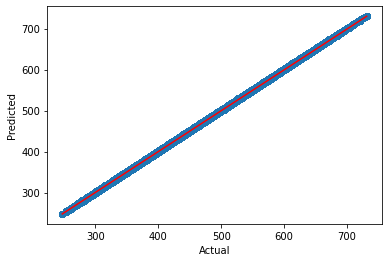

In [31]:
plt.scatter(valid_y,ypred)
plt.plot([valid_y.min(),valid_y.max()],[ypred.min(),ypred.max()], color='red')
#plt.plot(valid_X,valid_y, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

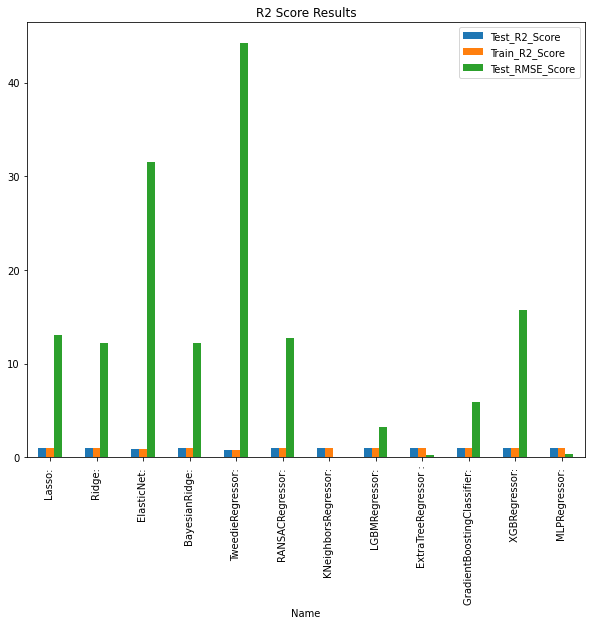

In [32]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;